# S Based Data Viz.
In this notebook, we try to visualize how the intensity values change for different values of maternal and fetal saturation + Hb concentration

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from inverse_modelling_tfo.models import train_model, create_perceptron_model, train_model_wtih_reporting
from inverse_modelling_tfo.data import generate_data_loaders, equidistance_detector_normalization, constant_detector_count_normalization
from inverse_modelling_tfo.data.intensity_interpolation import get_interpolate_fit_params_custom, interpolate_exp
from inverse_modelling_tfo.data.interpolation_function_zoo import *

In [45]:
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/s_based_intensity.pkl')
equidistance_detector_normalization(data)

# Interpolate intensity to remove noise
data = interpolate_exp(data, weights=[1, -1])
# data['Intensity'] = data['Interpolated Intensity']

data['Intensity'] = np.log10(data['Intensity'])        # Far values wayy to small to affect anything. Take log
data.head()

,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation,Interpolated Intensity
0,10,-5.387352,2.0,5.0,26.0,12.0,0.9,11.0,0.9,4.140170e-06
1,14,-8.046659,2.0,5.0,26.0,12.0,0.9,11.0,0.9,9.080710e-09
2,19,-11.326366,2.0,5.0,26.0,12.0,0.9,11.0,0.9,4.773587e-12
3,23,-14.367172,2.0,5.0,26.0,12.0,0.9,11.0,0.9,4.496034e-15
4,28,-17.646161,2.0,5.0,26.0,12.0,0.9,11.0,0.9,1.626531e-19


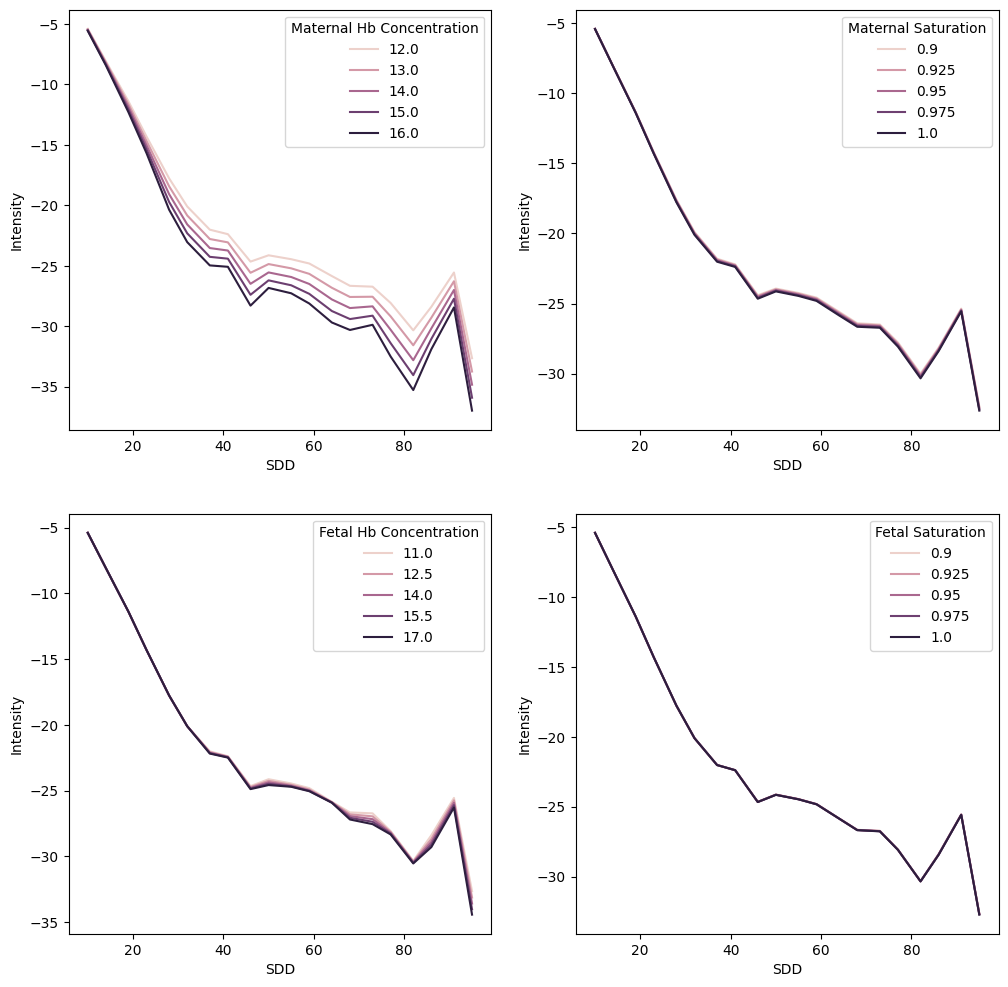

In [46]:
THICKNESS = 10.0
filtered_data1 = data[(data['Maternal Saturation']==1.0) & (data["Fetal Saturation"]==0.9) & (data['Fetal Hb Concentration']==11.0) & (data['Wave Int']==2.0) & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data2 = data[(data['Maternal Hb Concentration']==12.0) & (data["Fetal Saturation"]==0.9) & (data['Fetal Hb Concentration']==11.0) & (data['Wave Int']==2.0) & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data3 = data[(data['Maternal Hb Concentration']==12.0) & (data["Fetal Saturation"]==0.9) & (data['Maternal Saturation']==1.0) & (data['Wave Int']==2.0) & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data4 = data[(data['Maternal Hb Concentration']==12.0) & (data["Fetal Hb Concentration"]==11.0) & (data['Maternal Saturation']==1.0) & (data['Wave Int']==2.0) & (data['Maternal Wall Thickness']==THICKNESS)]
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_data1, x='SDD', y='Intensity', hue='Maternal Hb Concentration')
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_data2, x='SDD', y='Intensity', hue='Maternal Saturation')
plt.subplot(2, 2, 3)
sns.lineplot(data=filtered_data3, x='SDD', y='Intensity', hue='Fetal Hb Concentration')
plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_data4, x='SDD', y='Intensity', hue='Fetal Saturation')
plt.show()

In [44]:
data['Fetal Hb Concentration'].value_counts()

11.0    30000
12.5    30000
14.0    30000
15.5    30000
17.0    30000
Name: Fetal Hb Concentration, dtype: int64

In [48]:
# DEBUG
from math import pi
from pandas import DataFrame


CONSTANT_DETECTOR_COUNT = 20
EQUIDISTANCE_DETECTOR_COUNT = [11, 16, 22, 27, 32, 38, 43,
                               48, 53, 59, 64, 69, 75, 80,
                               85, 90, 96, 101, 106, 111]
EQUIDISTANCE_DETECTOR_PHOTON_COUNT = 1e9
COUNSTANT_DETECTOR_COUNT_PHOTON_COUNT = 1e8
SIMULATION_DETECTOR_RADIUS = 2
SIMULATION_UNITINMM = 1.0

sdd = data['SDD'].unique()
sdd.sort()
sdd_to_detector_count_map = {
    dist: count for dist, count in zip(sdd, EQUIDISTANCE_DETECTOR_COUNT)}
# data['Intensity'] /= EQUIDISTANCE_DETECTOR_PHOTON_COUNT
data['Mapped Count'] = data['SDD'].map(sdd_to_detector_count_map)
# data['Intensity'] /= pi * SIMULATION_DETECTOR_RADIUS ** 2
